In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

---
# **Perceptron**

In [2]:
class perceptron:
    def __init__(self, alpha = 0.0001, max_iters=300):
        self.iters = max_iters
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        _, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iters):

            # w_new = w + alpha*(y-h(x))*x
            # bias = bias + alpha*(y-h(x))

            o_x = np.dot(X, self.weights) + self.bias
            h_x = o_x >= 0
            self.weights += self.alpha*np.dot(X.T, (y-h_x))
            self.bias += np.sum(self.alpha*(y-h_x))
        
        return
    
    def predict(self, X):
        return (np.dot(X, self.weights)+self.bias) >= 0


---
# **Code Usage**

## **Example-1**

In [3]:
if __name__ == '__main__':
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    y = np.array([0, 1, 1, 1])

    cls = perceptron(alpha=0.001, max_iters=10)

    cls.fit(X, y)

    predictions = cls.predict(X)
    for inp, out in zip(X, predictions):
        print(inp, '->', out)

[0 0] -> False
[0 1] -> True
[1 0] -> True
[1 1] -> True


* Fits well on separable data.

## **Example-2**

In [4]:
if __name__ == '__main__':
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    y = np.array([0, 1, 1, 0])

    cls = perceptron(alpha=0.001, max_iters=100)

    cls.fit(X, y)

    predictions = cls.predict(X)
    for inp, out in zip(X, predictions):
        print(inp, '->', out)

[0 0] -> True
[0 1] -> True
[1 0] -> True
[1 1] -> True


* Unable to fit on non-separable data.

## **Example-3**

In [5]:
def dataloader():
    df = pd.read_csv('../data/diabetes.csv')
    return df

def preprocessor(df):
    y = df['Outcome'].to_numpy()
    X = df.drop(['Outcome'], axis=1).to_numpy()

    X = scaler().fit_transform(X)
    X, y = shuffle(X,y, random_state=42)

    return X, y

In [6]:
# Loading dataset
X, y = preprocessor(dataloader())

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

train_X, test_X, train_y , test_y = tts(X, y, random_state=42)

print("Number of examples in training set:", train_X.shape[0])
print("Number of examples in test set:", test_X.shape[0])


Feature Shape: (768, 8)
Target Shape: (768,)
Number of examples in training set: 576
Number of examples in test set: 192


In [7]:
# Fit curve for the best parameter 
cls = perceptron(alpha=0.001, max_iters=150)
cls.fit(train_X, train_y)


# Perfomance on training set
train_pred = cls.predict(train_X)
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       381
           1       0.53      0.51      0.52       195

    accuracy                           0.68       576
   macro avg       0.64      0.64      0.64       576
weighted avg       0.68      0.68      0.68       576



In [8]:
# Performance on test set
test_pred = cls.predict(test_X)

print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       119
           1       0.58      0.59      0.59        73

    accuracy                           0.68       192
   macro avg       0.66      0.66      0.66       192
weighted avg       0.68      0.68      0.68       192



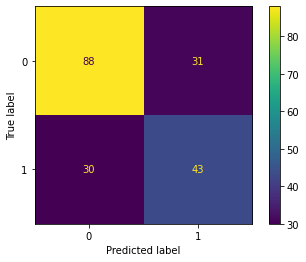

In [9]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y, test_pred), display_labels=[0,1]).plot();